
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

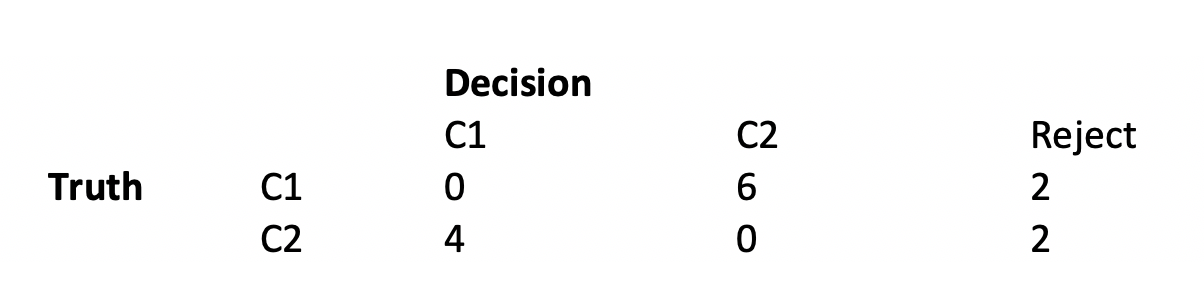

## Answer

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

    -  Calibration = good estimates of posterior probabilities 

## Answer

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X = (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

C:\Users\amytm\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\amytm\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [3]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11861, 784) (11861,) (1922, 784) (1922,)


## Answer

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

#### Logistic Regression

In [20]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
LRpred = logisticRegr.predict_proba(X_test)[::,1]

#### Naive Bayes

In [15]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
NBpred = naive_bayes.predict_proba(X_test)[::,1]

#### MLP Classifiers

In [16]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
MLPpred = mlp.predict_proba(X_test)[::,1]

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

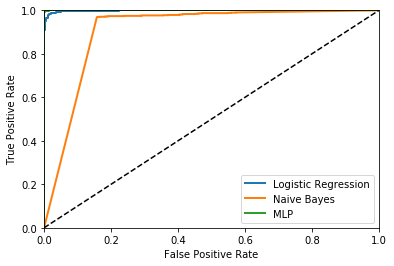

In [34]:
from sklearn.metrics import roc_curve

fprLR, tprLR, thresholdsLR = roc_curve(y_test, LRpred)
fprNB, tprNB, thresholdsNB = roc_curve(y_test, NBpred)
fprMLP, tprMLP, thresholdsMLP = roc_curve(y_test, MLPpred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fprLR, tprLR, linewidth=2, label='Logistic Regression')
    plt.plot(fprNB, tprNB, linewidth=2, label='Naive Bayes')
    plt.plot(fprMLP, tprMLP, linewidth=2, label='MLP')
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.legend()
plt.show()

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

In [36]:
from sklearn.metrics import roc_auc_score 

print ('Accuracy for Logistic Regression', roc_auc_score(y_test, LRpred))
print ('Accuracy for Naive Bayes', roc_auc_score(y_test, NBpred))
print ('Accuracy for MLP', roc_auc_score(y_test, MLPpred))

Accuracy for Logistic Regression 0.9986797300107442
Accuracy for Naive Bayes 0.9081480911863584
Accuracy for MLP 0.9999133538973417


4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

    -  